## we Should do the following:
1. Load heart disease dataset in pandas dataframe
2. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
3. Convert text columns to numbers using label encoding and one hot encoding
4. Apply scaling
5. Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
6. Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life

In [46]:
# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### 1.Load heart disease dataset in pandas dataframe


In [48]:
df=pd.read_csv(r"K:\Kaggle data sets\Machine learning DS\PCA\heart.csv")

In [49]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### 2.Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3

<Axes: xlabel='MaxHR'>

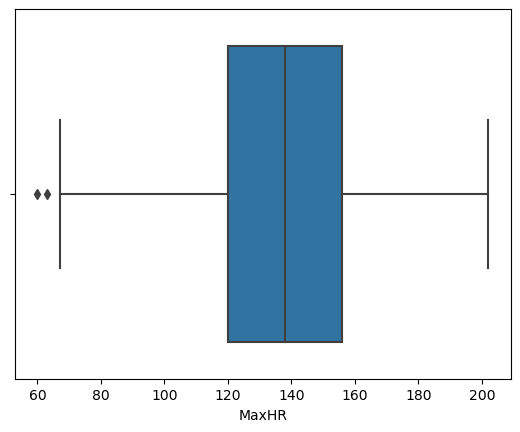

In [50]:
sns.boxplot(x="MaxHR",data=df)

<Axes: xlabel='Cholesterol'>

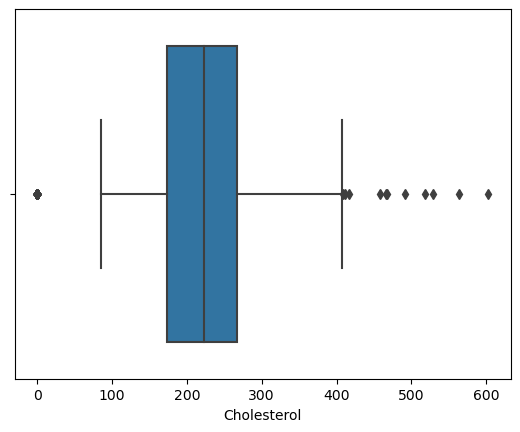

In [51]:
sns.boxplot(x="Cholesterol",data=df)

<Axes: xlabel='RestingBP'>

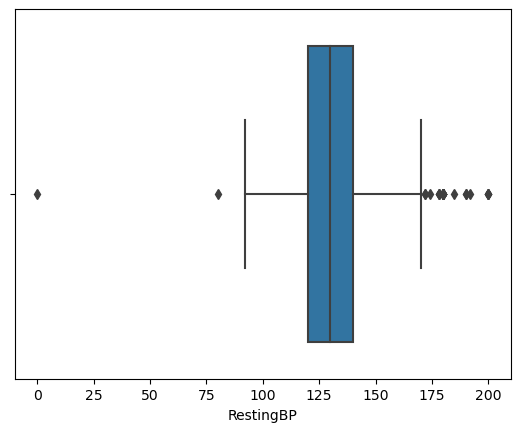

In [52]:
sns.boxplot(x="RestingBP",data=df)

<Axes: xlabel='Age'>

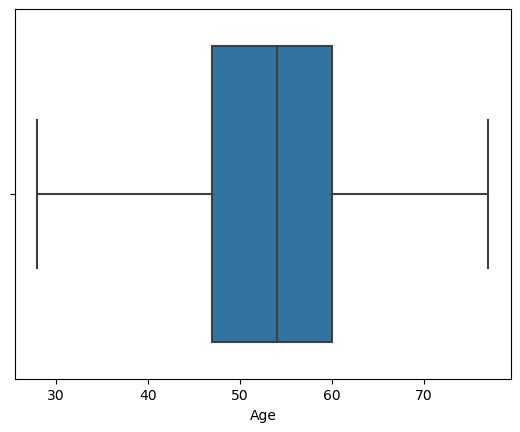

In [53]:
sns.boxplot(x="Age",data=df)

#### As we see there are outliers in RestingBP,Cholesterol,MaxHR columns and there aren't any in the Age column

### Start applying the Z-Score  to detect and remove the outliers

In [54]:
df["zscore_RestingBP"]=(df.RestingBP-df.RestingBP.mean())/df.RestingBP.std()
df["zscore_Cholesterol"]=(df.Cholesterol-df.Cholesterol.mean())/df.Cholesterol.std()
df["zscore_MaxHR"]=(df.MaxHR-df.MaxHR.mean())/df.MaxHR.std()

In [55]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,zscore_RestingBP,zscore_Cholesterol,zscore_MaxHR
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.410685,0.824621,1.382175
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.490940,-0.171867,0.753746
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-0.129442,0.769768,-1.524307
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.302660,0.138964,-1.131539
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.950812,-0.034736,-0.581664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-1.209697,0.596068,-0.188897
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0.626736,-0.053020,0.164595
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.129442,-0.619830,-0.856602
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,-0.129442,0.340090,1.460728


#### displaying the data points that have a zscore >3 and <-3

In [56]:
#outliers = df[(df["zscore_RestingBP"] < -3) | (df["zscore_RestingBP"] > 3) |
           #   (df["zscore_Cholesterol"] < -3) | (df["zscore_Cholesterol"] > 3) |
             # (df["zscore_MaxHR"] < -3) | (df["zscore_MaxHR"] > 3)]

In [57]:
#automated 
columns = ["RestingBP", "Cholesterol", "MaxHR"]
zscore_columns = ["zscore_" + col for col in columns]

outliers = df[df[zscore_columns].apply(lambda x: (x < -3) | (x > 3)).any(axis=1)]

In [58]:
#displaying the outliers
outliers

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,zscore_RestingBP,zscore_Cholesterol,zscore_MaxHR
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1,-0.777595,3.018723,-0.267450
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0,3.111322,0.385800,-1.210093
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1,-0.129442,3.695238,-0.463834
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1,3.651449,-0.007310,0.203871
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1,3.651449,-1.817444,0.125318
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1,0.410685,-1.817444,-3.016825
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1,3.651449,-1.817444,-2.624057
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1,-7.151097,-1.817444,0.714469
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1,3.111322,0.806337,0.518086
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0,-0.939633,3.338696,0.910853


In [59]:
outliers.shape

(12, 15)

##### Remove the outliers and produce new dataframe


In [60]:
df.shape

(918, 15)

In [61]:
dff=df.drop(outliers.index)

In [62]:
dff.shape

(906, 15)

## 3.Convert text columns to numbers using label encoding and one hot encoding


In [63]:
final =pd.get_dummies(dff,drop_first=True)
final

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,zscore_RestingBP,zscore_Cholesterol,zscore_MaxHR,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.410685,0.824621,1.382175,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1.490940,-0.171867,0.753746,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,-0.129442,0.769768,-1.524307,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0.302660,0.138964,-1.131539,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,0.950812,-0.034736,-0.581664,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,-1.209697,0.596068,-0.188897,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0.626736,-0.053020,0.164595,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,-0.129442,-0.619830,-0.856602,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,-0.129442,0.340090,1.460728,0,1,0,0,0,0,0,1,0


## 4. Apply scaling using MinMaxScaler()


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [65]:
scaler.fit(final[["RestingBP"]])
final["RestingBP"]=scaler.transform(final[["RestingBP"]])

In [66]:
scaler.fit(final[["Cholesterol"]])
final["Cholesterol"]=scaler.transform(final[["Cholesterol"]])

In [67]:
scaler.fit(final[["MaxHR"]])
final["MaxHR"]=scaler.transform(final[["MaxHR"]])

In [68]:
final

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,zscore_RestingBP,zscore_Cholesterol,zscore_MaxHR,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,0.571429,0.557915,0,0.784173,0.0,0,0.410685,0.824621,1.382175,1,1,0,0,1,0,0,0,1
1,49,0.761905,0.347490,0,0.669065,1.0,1,1.490940,-0.171867,0.753746,0,0,1,0,1,0,0,1,0
2,37,0.476190,0.546332,0,0.251799,0.0,0,-0.129442,0.769768,-1.524307,1,1,0,0,0,1,0,0,1
3,48,0.552381,0.413127,0,0.323741,1.5,1,0.302660,0.138964,-1.131539,0,0,0,0,1,0,1,1,0
4,54,0.666667,0.376448,0,0.424460,0.0,0,0.950812,-0.034736,-0.581664,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0.285714,0.509653,0,0.496403,1.2,1,-1.209697,0.596068,-0.188897,1,0,0,1,1,0,0,1,0
914,68,0.609524,0.372587,1,0.561151,3.4,1,0.626736,-0.053020,0.164595,1,0,0,0,1,0,0,1,0
915,57,0.476190,0.252896,0,0.374101,1.2,1,-0.129442,-0.619830,-0.856602,1,0,0,0,1,0,1,1,0
916,57,0.476190,0.455598,0,0.798561,0.0,1,-0.129442,0.340090,1.460728,0,1,0,0,0,0,0,1,0


## 5.Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy

In [69]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [70]:
X=final.drop("HeartDisease",axis="columns")
y=final.HeartDisease

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
a=cross_val_score(LogisticRegression(),X,y)
a.mean()

0.8344059255661467

In [74]:
b=cross_val_score(SVC(),X,y)
b.mean()

0.7009046202416368

In [75]:
c=cross_val_score(RandomForestClassifier(),X,y)
c.mean()


0.8156153239026167

## 6.Now use PCA to reduce dimensions

In [76]:
X=final.drop("HeartDisease",axis="columns")
y=final.HeartDisease
X.shape

(906, 18)

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca =PCA(n_components=10)

In [79]:
X_pca=pca.fit_transform(X)

In [80]:
X_pca.shape

(906, 10)

In [81]:
pca.n_components_

10

#### now we will redo the splitting and fitting of data 

In [82]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [83]:
X=X_pca
y=final.HeartDisease

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [85]:
a=cross_val_score(LogisticRegression(),X,y)
a.mean()

0.8200777123429057

In [86]:
b=cross_val_score(SVC(),X,y)
b.mean()

0.7858539250804444

In [87]:
c=cross_val_score(RandomForestClassifier(),X,y)
c.mean()

0.8156153239026167

#### We can notice that the scores changed compared to prior of applying PCA, And we can  keep in mind that doing PCA many times  reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life